In [1]:
# Importing libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Resizing all images
image_size = [224, 224]

train_path = 'Datasets/Train/'
valid_path = 'Datasets/Test/'

In [3]:
# Importing the ResNet 50 library
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [4]:
# Not training the existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# Getting number of output classes
folders = glob('Datasets/Train/*')

In [6]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating model object
model = Model(inputs = resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
# Optimizations for the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
# Use ImageDataGenerator to augment our datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True)
# No augmentation in test data:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
#Fitting the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\User\AppData\Local\Temp\ipykernel_10052\152507915.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
2/2 [==============================] - 26s 15s/step - loss: 4.7828 - accuracy: 0.4688 - val_loss: 9.3204 - val_accuracy: 0.1552
Epoch 2/30
2/2 [==============================] - 19s 14s/step - loss: 4.0770 - accuracy: 0.3750 - val_loss: 4.4284 - val_accuracy: 0.5172
Epoch 3/30
2/2 [==============================] - 18s 13s/step - loss: 6.1262 - accuracy: 0.3750 - val_loss: 5.8390 - val_accuracy: 0.3276
Epoch 4/30
2/2 [==============================] - 18s 13s/step - loss: 7.1939 - accuracy: 0.3906 - val_loss: 3.5527 - val_accuracy: 0.3276
Epoch 5/30
2/2 [==============================] - 18s 13s/step - loss: 2.4217 - accuracy: 0.4219 - val_loss: 3.2251 - val_accuracy: 0.2586
Epoch 6/30
2/2 [==============================] - 18s 13s/step - loss: 3.1519 - accuracy: 0.4062 - val_loss: 3.6959 - val_accuracy: 0.3793
Epoch 7/30
2/2 [==============================] - 18s 13s/step - loss: 3.3976 - accuracy: 0.3906 - val_loss: 2.5534 - val_accuracy: 0.5172
Epoch 8/30
2/2 [===========

### Visualizing losses:

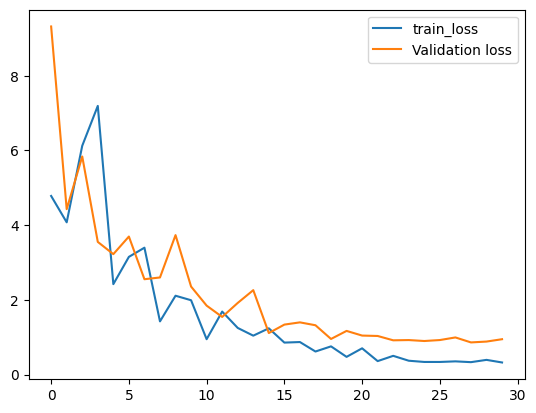

In [15]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

### Visualizing accuracies:

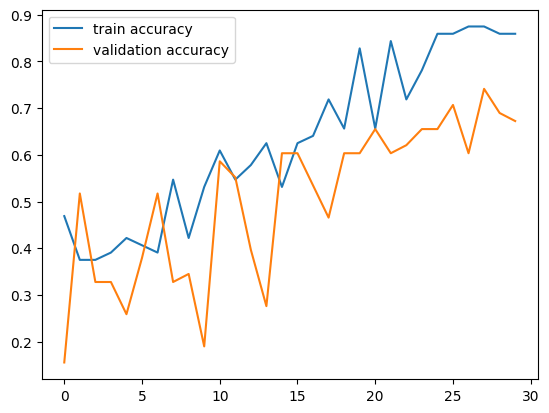

In [16]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()

### Saving our model as a h5 file:

In [17]:
from tensorflow.keras.models import load_model

model.save('model_ResNet50.h5')

### Making predictions:

In [18]:
pred = model.predict(test_set)

2/2 [==============================] - 10s 4s/step


In [19]:
pred

array([[2.15751771e-02, 3.71556147e-04, 9.78053212e-01],
       [5.20912372e-03, 6.88126922e-01, 3.06663930e-01],
       [6.20531924e-02, 1.01314858e-02, 9.27815259e-01],
       [8.91634762e-01, 4.18543741e-02, 6.65108338e-02],
       [3.90689254e-01, 5.07215023e-01, 1.02095746e-01],
       [5.84451929e-02, 1.46417767e-01, 7.95136988e-01],
       [4.60871607e-01, 3.19756985e-01, 2.19371378e-01],
       [1.83094814e-01, 3.23896348e-01, 4.93008822e-01],
       [1.69870723e-02, 1.97123885e-01, 7.85889030e-01],
       [8.58950138e-04, 9.44032431e-01, 5.51085807e-02],
       [1.03356205e-01, 5.76334149e-02, 8.39010417e-01],
       [2.51657777e-02, 1.95521023e-03, 9.72878993e-01],
       [2.74966634e-03, 9.69408631e-01, 2.78416723e-02],
       [5.24724051e-02, 5.11030376e-01, 4.36497182e-01],
       [4.47388381e-01, 1.44432336e-02, 5.38168371e-01],
       [2.22632110e-01, 1.48707390e-01, 6.28660500e-01],
       [4.99524586e-02, 8.12002838e-01, 1.38044685e-01],
       [2.27534279e-01, 3.86374

In [20]:
# Making our predictions easier to understand:
pred = np.argmax(pred, axis=1)

In [21]:
pred

array([2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2], dtype=int64)

### Making real-time predictions:

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model = load_model('model_ResNet50.h5')

In [24]:
# Reading our input image:
img = image.load_img('Datasets/Test/lamborghini/14.jpg', target_size=(224, 224))

In [25]:
x = image.img_to_array(img)

In [26]:
x

array([[[ 65.,  58.,  48.],
        [ 65.,  58.,  48.],
        [ 65.,  58.,  48.],
        ...,
        [197., 213., 200.],
        [158., 159., 143.],
        [133., 130., 113.]],

       [[ 65.,  58.,  48.],
        [ 65.,  58.,  48.],
        [ 66.,  59.,  49.],
        ...,
        [197., 213., 200.],
        [158., 159., 143.],
        [133., 130., 113.]],

       [[ 67.,  58.,  49.],
        [ 67.,  58.,  49.],
        [ 68.,  59.,  50.],
        ...,
        [196., 212., 199.],
        [158., 159., 143.],
        [133., 130., 113.]],

       ...,

       [[102.,  96.,  98.],
        [101.,  95.,  97.],
        [100.,  94.,  96.],
        ...,
        [112., 112., 104.],
        [123., 119., 110.],
        [127., 123., 114.]],

       [[112., 106., 108.],
        [112., 106., 108.],
        [115., 109., 111.],
        ...,
        [109., 109., 101.],
        [125., 121., 112.],
        [128., 124., 115.]],

       [[113., 107., 109.],
        [115., 109., 111.],
        [123., 1

In [27]:
# Confirming the shape:
x.shape

(224, 224, 3)

In [28]:
x = x/255 # Did this in accordance to test_datagen(cell 11)

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[1.4976995e-05, 1.3723180e-03, 9.9861264e-01]], dtype=float32)

In [31]:
finalOutput = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 223ms/step


In [32]:
finalOutput

array([2], dtype=int64)